<a href="https://colab.research.google.com/github/LluisArrue/idal_ia3_uv/blob/main/Penguin_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from seaborn import load_dataset
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, roc_curve, auc

import matplotlib.pyplot as plt

import plotly.express as px

## Data

### Carga de datos

In [2]:
dataset = load_dataset("penguins")
dataset.dropna(inplace=True)
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


### División de datos

In [3]:
X = dataset.drop(columns='sex')

In [4]:
X[X['species'].unique()] = pd.get_dummies(X['species'])
X=X.drop(columns= 'species')
X[X['island'].unique()] = pd.get_dummies(X['island'])
X=X.drop(columns= 'island')

In [5]:
y = pd.Series([1 if i == 'Male' else 0 for i in dataset['sex']])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(f'The lenght of X train is {len(X_train)}')
print(f'The lenght of X test is {len(X_test)}')

The lenght of X train is 233
The lenght of X test is 100


### Normalización de datos

In [7]:
bill_l_mean = X_train['bill_length_mm'].mean()
bill_l_std = X_train['bill_length_mm'].std()
X_train['bill_length_mm'] = [(i- bill_l_mean)/bill_l_std for i in X_train['bill_length_mm']]
X_test['bill_length_mm'] = [(i- bill_l_mean)/bill_l_std for i in X_test['bill_length_mm']]

bill_d_mean = X_train['bill_depth_mm'].mean()
bill_d_std = X_train['bill_depth_mm'].std()
X_train['bill_depth_mm'] = [(i- bill_d_mean)/bill_d_std for i in X_train['bill_depth_mm']]
X_test['bill_depth_mm'] = [(i- bill_d_mean)/bill_d_std for i in X_test['bill_depth_mm']]

flipper_l_mean = X_train['flipper_length_mm'].mean()
flipper_l_std = X_train['flipper_length_mm'].std()
X_train['flipper_length_mm'] = [(i- flipper_l_mean)/flipper_l_std for i in X_train['flipper_length_mm']]
X_test['flipper_length_mm'] = [(i- flipper_l_mean)/flipper_l_std for i in X_test['flipper_length_mm']]

bdy_mss_mean = X_train['body_mass_g'].mean()
bdy_mss_std = X_train['body_mass_g'].std()
X_train['body_mass_g'] = [(i- bdy_mss_mean)/bdy_mss_std for i in X_train['body_mass_g']]
X_test['body_mass_g'] = [(i- bdy_mss_mean)/bdy_mss_std for i in X_test['body_mass_g']]

X_train.head()
X_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Adelie,Chinstrap,Gentoo,Torgersen,Biscoe,Dream
30,-0.874211,-0.209109,-1.659961,-1.161316,1,0,0,0,1,0
317,0.510297,-1.294128,1.512657,0.826718,0,0,1,1,0,0
79,-0.387762,1.030912,-0.434177,-0.243762,1,0,0,0,0,1
201,1.052875,0.100896,-0.217862,-0.641369,0,1,0,0,1,0
63,-0.574857,0.565904,-0.650492,-0.182592,1,0,0,1,0,0


## Bernoulli Navie Bayes   


### Entrenamiento

In [8]:
l=[]
for i in range (0,20):
  x= i/10
  model = BernoulliNB(binarize=x)
  model.fit(X_train, y_train)
  trSc = model.score(X_train, y_train)
  tsSc = model.score(X_test, y_test)
  l.append([x,trSc,tsSc])
  print(f'With binarize = {x}\n train score: {trSc}, test score {tsSc}')

With binarize = 0.0
 train score: 0.6394849785407726, test score 0.62
With binarize = 0.1
 train score: 0.6266094420600858, test score 0.6
With binarize = 0.2
 train score: 0.6566523605150214, test score 0.6
With binarize = 0.3
 train score: 0.6952789699570815, test score 0.66
With binarize = 0.4
 train score: 0.721030042918455, test score 0.69
With binarize = 0.5
 train score: 0.8111587982832618, test score 0.79
With binarize = 0.6
 train score: 0.776824034334764, test score 0.72
With binarize = 0.7
 train score: 0.8068669527896996, test score 0.77
With binarize = 0.8
 train score: 0.8240343347639485, test score 0.76
With binarize = 0.9
 train score: 0.8283261802575107, test score 0.79
With binarize = 1.0
 train score: 0.8197424892703863, test score 0.77
With binarize = 1.1
 train score: 0.7896995708154506, test score 0.7
With binarize = 1.2
 train score: 0.7939914163090128, test score 0.74
With binarize = 1.3
 train score: 0.7725321888412017, test score 0.71
With binarize = 1.4
 trai

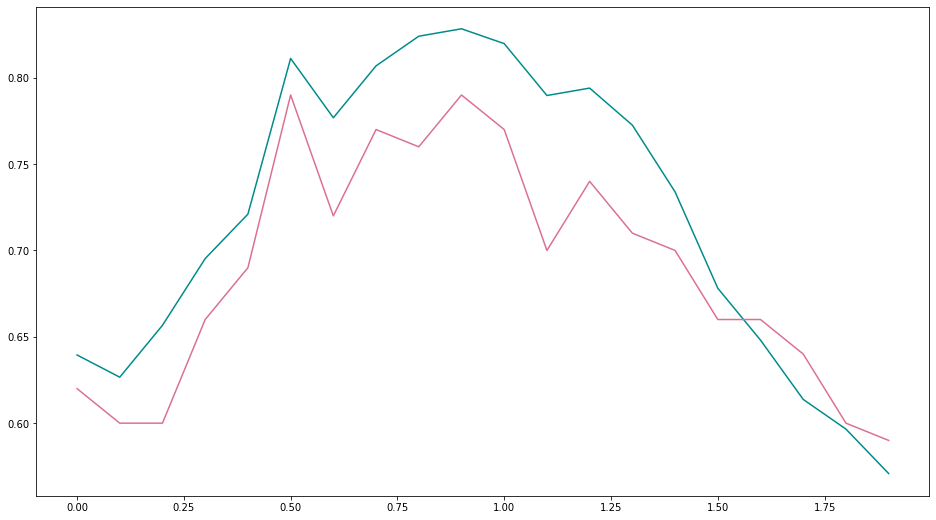

In [9]:
l = np.array(l)
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(l[:,0],l[:,1], color='darkcyan')
plt.plot(l[:,0],l[:,2], color= 'palevioletred')

In [10]:
model = BernoulliNB(binarize=0.9, fit_prior=False)
model.fit(X_train, y_train)
trSc = model.score(X_train, y_train)
tsSc = model.score(X_test, y_test)
print(f'Train score: {trSc}\n test score: {tsSc}')

Train score: 0.8283261802575107
 test score: 0.79


### Estadísticas

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, list(model.predict_proba(X_test)[:,1]), drop_intermediate= False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.983335
1,0.000000,0.230769,0.983335
2,0.000000,0.346154,0.961465
3,0.020833,0.442308,0.833765
4,0.062500,0.519231,0.702108
5,0.125000,0.576923,0.690216
6,0.145833,0.634615,0.686745
7,0.166667,0.769231,0.677517
8,0.187500,0.769231,0.610882
9,0.333333,0.769231,0.445238


In [12]:
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

In [13]:
auc(fpr,tpr)

0.8064903846153847

In [14]:
predpr = model.predict_proba(X_test)[:,1]

In [15]:
l = []
for j in range(100):
  x = j/100
  rl = []
  for i in predpr:
    if i > x:
      rl.append(1)
    else:
      rl.append(0)
  bl =[]
  for i in range(len(rl)):
    if rl[i] == y_test.iloc[i]:
      bl.append(True)
    else:
      bl.append(False)
  l.append([x,sum(bl) / len(bl)])
  print( f' With threshold {x} the predictions are {sum(bl) / len(bl)} accurate')

 With threshold 0.0 the predictions are 0.52 accurate
 With threshold 0.01 the predictions are 0.52 accurate
 With threshold 0.02 the predictions are 0.52 accurate
 With threshold 0.03 the predictions are 0.52 accurate
 With threshold 0.04 the predictions are 0.52 accurate
 With threshold 0.05 the predictions are 0.52 accurate
 With threshold 0.06 the predictions are 0.52 accurate
 With threshold 0.07 the predictions are 0.52 accurate
 With threshold 0.08 the predictions are 0.52 accurate
 With threshold 0.09 the predictions are 0.52 accurate
 With threshold 0.1 the predictions are 0.52 accurate
 With threshold 0.11 the predictions are 0.52 accurate
 With threshold 0.12 the predictions are 0.52 accurate
 With threshold 0.13 the predictions are 0.52 accurate
 With threshold 0.14 the predictions are 0.52 accurate
 With threshold 0.15 the predictions are 0.52 accurate
 With threshold 0.16 the predictions are 0.62 accurate
 With threshold 0.17 the predictions are 0.64 accurate
 With thresh

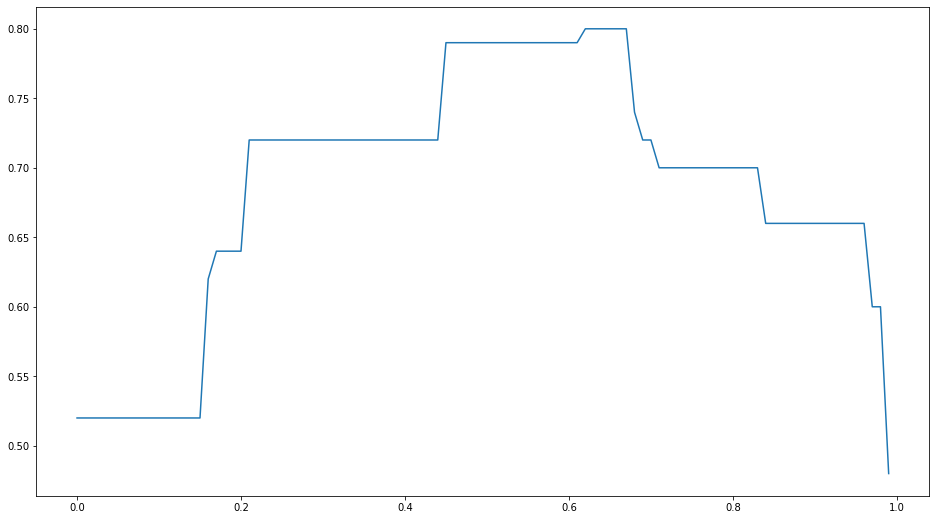

In [16]:
l = np.array(l)
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(l[:,0],l[:,1])

El threshold que nos da mejor resultado es: 0.64

## Categorical Navie Baies

In [17]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Adelie,Chinstrap,Gentoo,Torgersen,Biscoe,Dream
27,-0.687115,0.410901,-1.011017,-1.222487,1,0,0,1,0,0
292,0.753522,-0.777453,1.440552,1.101984,0,0,1,1,0,0
302,0.603845,-1.294128,0.791607,0.643207,0,0,1,1,0,0
62,-1.229692,-0.054107,-1.155227,-0.733124,1,0,0,1,0,0
181,1.614162,1.495920,0.286873,0.429111,0,1,0,0,1,0


### Convertimos todos los valores a positivos

In [18]:
bill_l_min = (X_train['bill_length_mm'].min()) *-1
X_train['bill_length_mm'] = [i+bill_l_min for i in X_train['bill_length_mm']]
X_test['bill_length_mm'] = [i+bill_l_min for i in X_test['bill_length_mm']]

bill_d_min = (X_train['bill_depth_mm'].min()) *-1
X_train['bill_depth_mm'] = [i+ bill_d_min + 0.0000001 for i in X_train['bill_depth_mm']]
X_test['bill_depth_mm'] = [i + bill_d_min+ 0.0000001 for i in X_test['bill_depth_mm']]

flipper_min = (X_train['flipper_length_mm'].min()) *-1
X_train['flipper_length_mm'] = [i+flipper_min + 0.0000001 for i in X_train['flipper_length_mm']]
X_test['flipper_length_mm'] = [i + flipper_min + 0.0000001 for i in X_test['flipper_length_mm']]

bdy_mss_min =( X_train['body_mass_g'].min()) *-1
X_train['body_mass_g'] = [i + bdy_mss_min + 0.0000001 for i in X_train['body_mass_g']]
X_test['body_mass_g'] = [i + bdy_mss_min + 0.0000001 for i in X_test['body_mass_g']]

X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Adelie,Chinstrap,Gentoo,Torgersen,Biscoe,Dream
27,1.571604,2.428375,1.081574,0.611703,1,0,0,1,0,0
292,3.012240,1.240021,3.533143,2.936173,0,0,1,1,0,0
302,2.862564,0.723346,2.884198,2.477396,0,0,1,1,0,0
62,1.029026,1.963367,0.937365,1.101065,1,0,0,1,0,0
181,3.872880,3.513394,2.379464,2.263300,0,1,0,0,1,0


In [19]:
X_train['flipper_length_mm'].min()

1e-07

### Entrenamiento

In [20]:
model = CategoricalNB(alpha=5)
model.fit(X_train, y_train)
trSc = model.score(X_train, y_train)
tsSc = model.score(X_test, y_test)
print(f'Train score: {trSc}\n test score {tsSc}')

Train score: 0.7896995708154506
 test score 0.81


In [21]:
l =[]
for i in range(20):
  x = i/100
  model = CategoricalNB(alpha=x)
  model.fit(X_train, y_train)
  trSc = model.score(X_train, y_train)
  tsSc = model.score(X_test, y_test)
  l.append([x,trSc,tsSc])
  print(f' For alpha={i}\n Train score: {trSc}\n test score {tsSc}')

 For alpha=0
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=1
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=2
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=3
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=4
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=5
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=6
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=7
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=8
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=9
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=10
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=11
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=12
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=13
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=14
 Train score: 0.7982832618025751
 test score 0.81
 For alpha=15
 Train score: 0.7982832618025751
 te

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



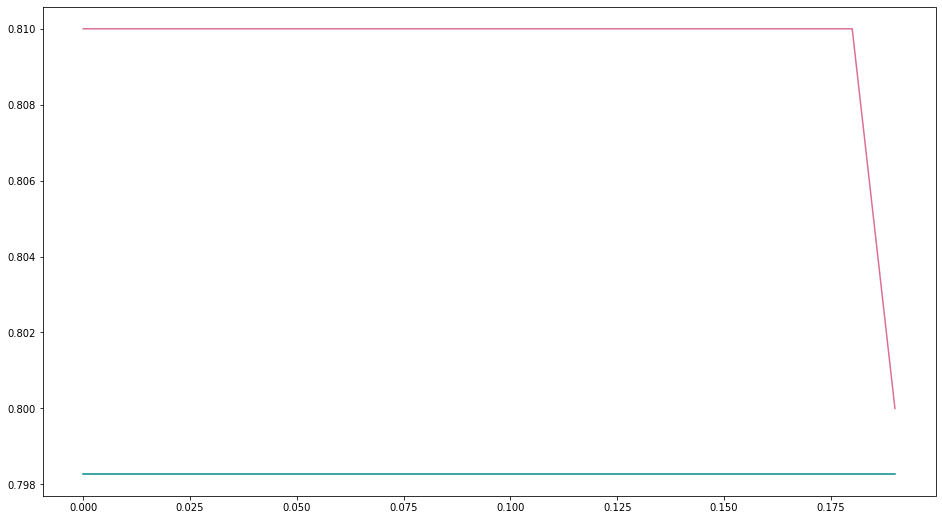

In [22]:
l = np.array(l)
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(l[:,0],l[:,1], color='darkcyan')
plt.plot(l[:,0],l[:,2], color= 'palevioletred')

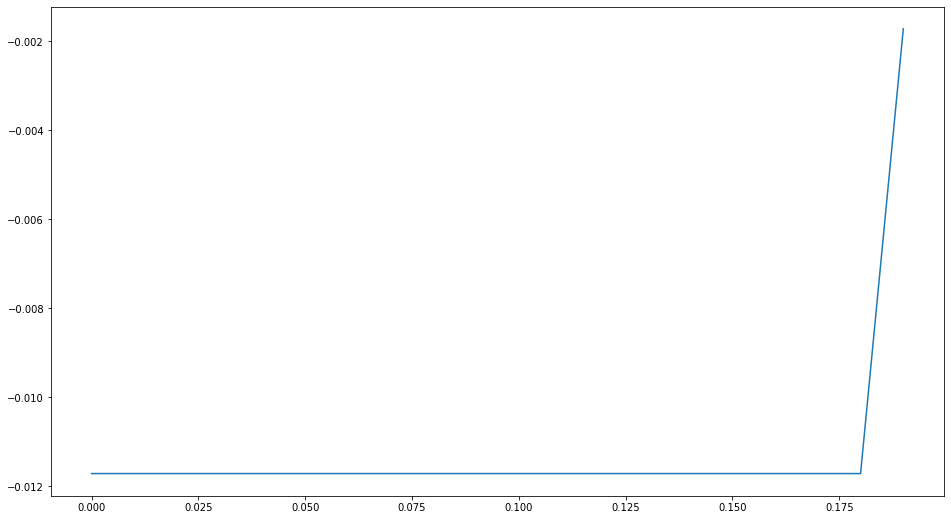

In [23]:
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(l[:,0],(l[:,1]-l[:,2]))

In [24]:
model = CategoricalNB()
model.fit(X_train, y_train)
trSc = model.score(X_train, y_train)
tsSc = model.score(X_test, y_test)

print(f'Train score: {trSc}\n test score: {tsSc}')

Train score: 0.7939914163090128
 test score: 0.8


### Estadísticas

In [25]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, list(model.predict_proba(X_test)[:,1]), drop_intermediate= False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
df_roc

,fpr,tpr,threshold
0,0.000000,0.000000,1.998835
1,0.000000,0.057692,0.998835
2,0.000000,0.076923,0.997905
3,0.000000,0.096154,0.997733
4,0.000000,0.192308,0.994621
...,...,...,...
61,0.875000,1.000000,0.022804
62,0.895833,1.000000,0.020323
63,0.916667,1.000000,0.013261
64,0.979167,1.000000,0.012347


In [27]:
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

In [28]:
auc(fpr,tpr)

0.9232772435897436

In [29]:
predpr = model.predict_proba(X_test)[:,1]

In [30]:
l = []
for j in range(100):
  x = j/100
  rl = []
  for i in predpr:
    if i > x:
      rl.append(1)
    else:
      rl.append(0)
  bl =[]
  for i in range(len(rl)):
    if rl[i] == y_test.iloc[i]:
      bl.append(True)
    else:
      bl.append(False)
  l.append([x,sum(bl) / len(bl)])
  print( f' With threshold {x} the predictions are {sum(bl) / len(bl)} accurate')

 With threshold 0.0 the predictions are 0.52 accurate
 With threshold 0.01 the predictions are 0.52 accurate
 With threshold 0.02 the predictions are 0.57 accurate
 With threshold 0.03 the predictions are 0.6 accurate
 With threshold 0.04 the predictions are 0.61 accurate
 With threshold 0.05 the predictions are 0.61 accurate
 With threshold 0.06 the predictions are 0.62 accurate
 With threshold 0.07 the predictions are 0.62 accurate
 With threshold 0.08 the predictions are 0.7 accurate
 With threshold 0.09 the predictions are 0.71 accurate
 With threshold 0.1 the predictions are 0.71 accurate
 With threshold 0.11 the predictions are 0.72 accurate
 With threshold 0.12 the predictions are 0.73 accurate
 With threshold 0.13 the predictions are 0.72 accurate
 With threshold 0.14 the predictions are 0.72 accurate
 With threshold 0.15 the predictions are 0.74 accurate
 With threshold 0.16 the predictions are 0.8 accurate
 With threshold 0.17 the predictions are 0.83 accurate
 With threshold

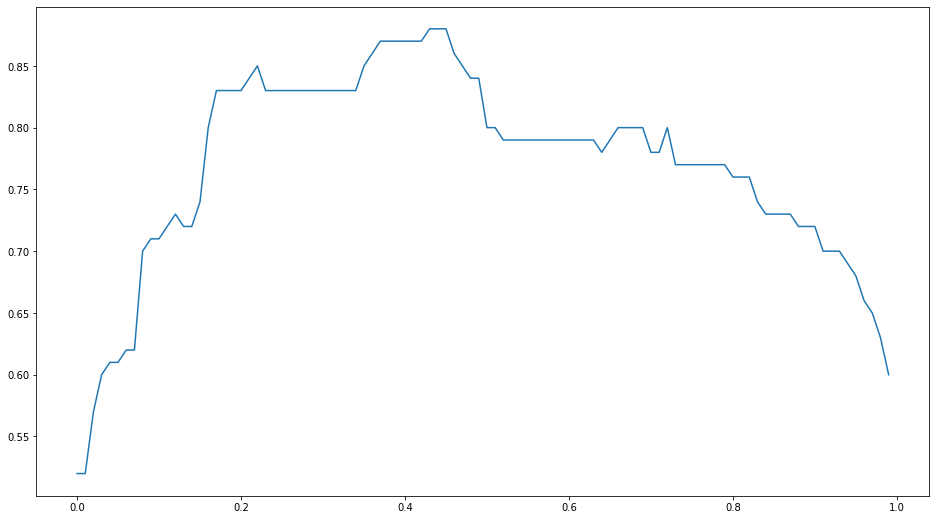

In [31]:
l = np.array(l)
fig, ax = plt.subplots(figsize = (16,9))
plt.plot(l[:,0],l[:,1])

El threshold que nos da mejor resultado es: 0.44

## Conclusión

El modelo que mejor resultado nos ha dado es el Categorical Naive Bayes, a pesar de no estar diseñado para hacer divisiones binomiales. 